In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
from sklearn import linear_model

C:\Users\mrb97\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\mrb97\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\mrb97\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\mrb97\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\mrb97\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 19

In [55]:
#for dataset
from sklearn.datasets import load_iris

In [56]:
iris=load_iris()

In [57]:
Xi=iris.data
Yi=iris.target

In [75]:
X=DataFrame(Xi)
X.columns=iris.feature_names
Y=DataFrame(Yi)
Z=DataFrame(Yi) #for checking the apply function
Z.columns=['species']

In [76]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [77]:
name={0:'Setosa',1:'Versicolor',2:'Virginica'}

In [79]:
Y=Y[Y.columns[0]].map(name)

In [80]:
Y

0         Setosa
1         Setosa
2         Setosa
3         Setosa
4         Setosa
         ...    
145    Virginica
146    Virginica
147    Virginica
148    Virginica
149    Virginica
Name: 0, Length: 150, dtype: object

In [81]:
def flower(a):
    if a==0:
        return 'Setosa'
    if a==1:
        return 'Versicolor'
    if a==2:
        return 'Virginica'

In [82]:
Z=Z['species'].apply(flower)
#same as Y, wanted to check

In [84]:
iris=pd.concat([X,Y],axis=1)

In [92]:
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),0
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [96]:
iris.columns=['sepal length (cm)',  'sepal width (cm)', 'petal length (cm)',
        'petal width (cm)','species']

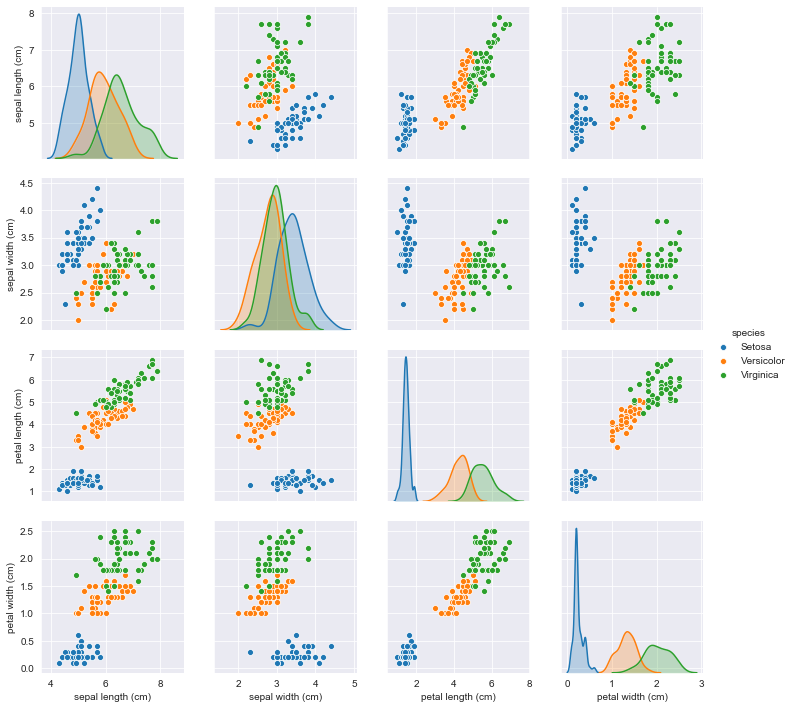

In [97]:
sns.pairplot(iris, hue='species')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019E64E85588>,
      dtype=object)

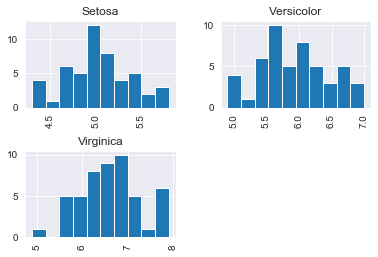

In [128]:
iris.hist('sepal length (cm)',by='species')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42]),
 <a list of 43 Text xticklabel objects>)

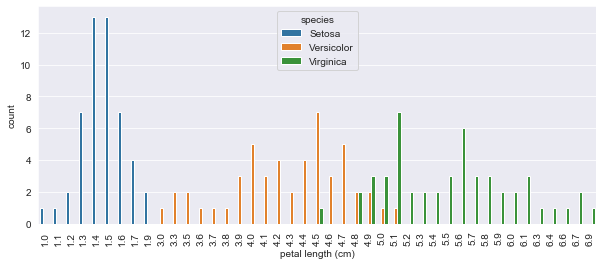

In [127]:
plt.figure(figsize=(10,4))
sns.countplot('petal length (cm)',data=iris,hue='species')
plt.xticks(rotation=90)

In [250]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
Xtr,Xte,Ytr,Yte=train_test_split(X,Y,test_size=50,random_state=123)

In [251]:
logreg=LogisticRegression()
logreg.fit(Xtr,Ytr)
ypred=logreg.predict(Xte)
print (metrics.accuracy_score(Yte,ypred))

0.98


C:\Users\mrb97\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mrb97\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


# kNN

In [252]:
from sklearn.neighbors import KNeighborsClassifier

In [265]:
knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(Xtr,Ytr)
knnypred=knn.predict(Xte)
print (metrics.accuracy_score(Yte,knnypred))

0.96


In [271]:
#hypertuning by hand
krange=range(1,21)
accuracy=[]
for k in krange:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(Xtr, Ytr)
    Y_pred = knn.predict(Xte)
    accuracy.append(metrics.accuracy_score(Yte, Y_pred))

Text(0, 0.5, 'Testing Accuracy')

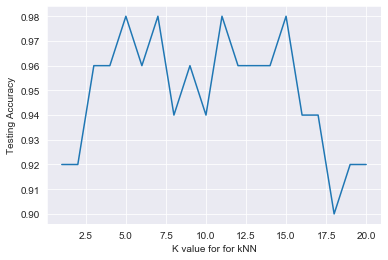

In [275]:
plt.plot(krange,accuracy)
plt.xlabel('K value for for kNN')
plt.ylabel('Testing Accuracy')